## Nuclear Morphology and Chromatin Organization Features

Here we aim to compute a library of features that exhaustively describe the nuclear morphology and chromatin organization for each segmented nucleus in a given image. 

In [1]:
# import libraries
%load_ext autoreload
import sys
sys.path.append("../")

from tifffile import imread
import pandas as pd 
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

import os
from nmco.nuclear_features import (
    global_morphology as BG,
    img_texture as IT,
    int_dist_features as IDF,
    boundary_local_curvature as BLC
)

In [2]:
# initialising paths
labelled_image_path = os.path.join(os.path.dirname(os.getcwd()),'example_data/nuc_labels.tif')
raw_image_path = os.path.join(os.path.dirname(os.getcwd()),'example_data/raw_image.tif')
feature_path = os.path.join(os.path.dirname(os.getcwd()),'example_data/')

Below is an example of the data that can be used. 

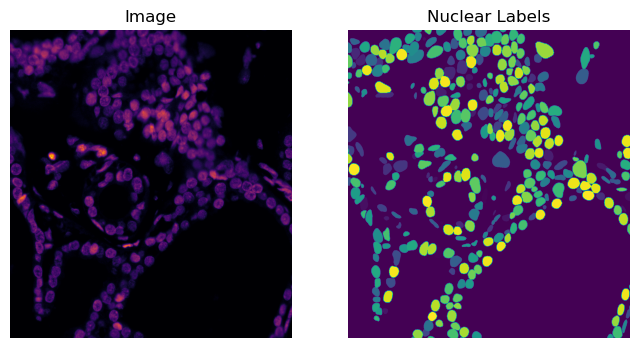

In [3]:
#Read in Images
labelled_image = imread(labelled_image_path)
raw_image = imread(raw_image_path)
labelled_image = labelled_image.astype(int)
raw_image = raw_image.astype(int)

# normalize images
raw_image = cv.normalize(raw_image, None, alpha=0, beta=150, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)   

#Visulaise the data

#save plots to show clusters
fig = plt.figure(figsize=(8, 4))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
#show raw image 
ax0.imshow(raw_image,aspect='auto',cmap='inferno') 
ax0.axis('off')
ax0.title.set_text('Image')
#show segmented image
ax1.imshow(labelled_image,aspect='auto',cmap='viridis') 
ax1.axis('off')
ax1.title.set_text('Nuclear Labels')

One can now access each nucleus in the labelled image as well as the raw image. 

(-0.5, 45.5, 49.5, -0.5)

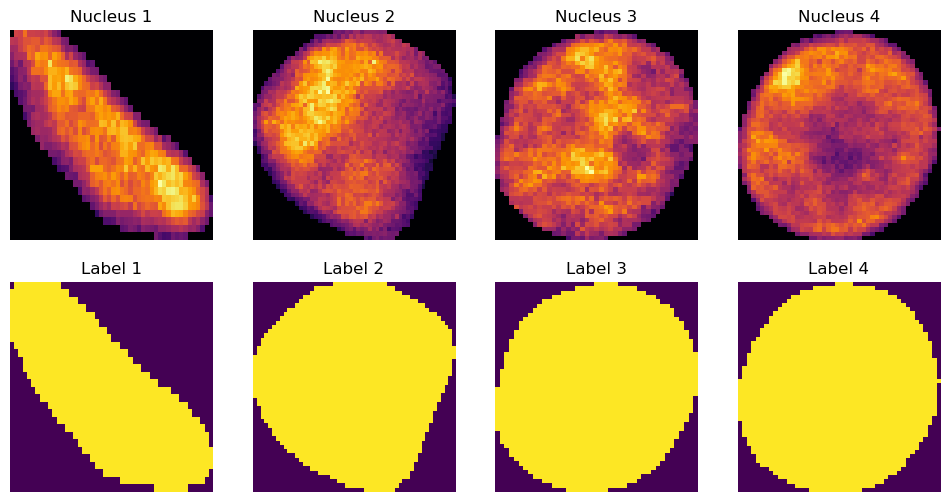

In [4]:
#Get indexing for the individual nuclei in the image
props = measure.regionprops(labelled_image,raw_image)

fig = plt.figure(figsize=(12, 6))
ax0 = fig.add_subplot(241)
ax1 = fig.add_subplot(242)
ax2 = fig.add_subplot(243)
ax3 = fig.add_subplot(244)
ax4 = fig.add_subplot(245)
ax5 = fig.add_subplot(246)
ax6 = fig.add_subplot(247)
ax7 = fig.add_subplot(248)

# Selecting a few nuclei 
nuc_of_interest = [90,112,216,301]
#show raw image 
ax0.imshow(props[nuc_of_interest[0]].intensity_image,aspect='auto',cmap='inferno') 
ax0.title.set_text('Nucleus 1')
ax0.axis('off')
ax1.imshow(props[nuc_of_interest[1]].intensity_image,aspect='auto',cmap='inferno') 
ax1.title.set_text('Nucleus 2')
ax1.axis('off')
ax2.imshow(props[nuc_of_interest[2]].intensity_image,aspect='auto',cmap='inferno') 
ax2.title.set_text('Nucleus 3')
ax2.axis('off')
ax3.imshow(props[nuc_of_interest[3]].intensity_image,aspect='auto',cmap='inferno') 
ax3.title.set_text('Nucleus 4')
ax3.axis('off')

#show segmented image
ax4.imshow(props[nuc_of_interest[0]].image,aspect='auto',cmap='viridis') 
ax4.title.set_text('Label 1')
ax4.axis('off')
ax5.imshow(props[nuc_of_interest[1]].image,aspect='auto',cmap='viridis') 
ax5.title.set_text('Label 2')
ax5.axis('off')
ax6.imshow(props[nuc_of_interest[2]].image,aspect='auto',cmap='viridis') 
ax6.title.set_text('Label 3')
ax6.axis('off')
ax7.imshow(props[nuc_of_interest[3]].image,aspect='auto',cmap='viridis') 
ax7.title.set_text('Label 4')
ax7.axis('off')


#### Basic Features

Scikit provides several informative features that describe "region properties". One can extract such built in features if required. For more information on how the features were computed check out the documentation(https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops_table). 

In [5]:
#Measure scikit's built in features
propstable = pd.DataFrame(measure.regionprops_table(labelled_image,raw_image,cache=True,
                               properties=['label', 'area','perimeter','bbox_area','convex_area',
                                           'equivalent_diameter','major_axis_length','minor_axis_length',
                                           'eccentricity','orientation',
                                            'centroid','weighted_centroid',
                                           'weighted_moments','weighted_moments_normalized',
                                           'weighted_moments_central','weighted_moments_hu',
                                            'moments','moments_normalized','moments_central','moments_hu']))
propstable.iloc[nuc_of_interest]

,label,area,perimeter,bbox_area,convex_area,equivalent_diameter,major_axis_length,minor_axis_length,eccentricity,orientation,...,moments_central-3-1,moments_central-3-2,moments_central-3-3,moments_hu-0,moments_hu-1,moments_hu-2,moments_hu-3,moments_hu-4,moments_hu-5,moments_hu-6
90,3130,713.0,122.225397,1344.0,754.0,30.130048,53.579712,17.382280,0.945913,1.105716,...,4.522561e+06,-1.341868e+07,1.283567e+09,0.278132,0.050698,6.359831e-04,8.032946e-05,1.395955e-09,-5.278407e-06,-1.810288e-08
112,3673,1922.0,164.852814,2597.0,1966.0,49.468843,51.168146,48.444670,0.321899,-1.397414,...,2.244878e+06,-2.498966e+07,-4.275299e+08,0.161455,0.000078,1.325327e-04,1.557887e-07,-7.075753e-13,8.255558e-10,2.109835e-14
216,6418,1614.0,148.710678,2064.0,1651.0,45.332203,48.933539,42.018660,0.512498,-0.374169,...,-5.541730e+06,-9.540562e+05,-1.061398e+09,0.161093,0.000593,3.744189e-07,3.680498e-09,-1.156270e-17,1.382977e-11,1.361375e-16
301,8075,1788.0,156.953319,2300.0,1830.0,47.713230,50.787427,44.847808,0.469280,-0.296335,...,-5.109879e+06,4.837510e+06,-1.137682e+09,0.160469,0.000394,3.761052e-06,1.461068e-08,9.491019e-16,8.965370e-11,-3.290870e-15


#### Global Morphology features

We compute the features that describe global morphology of a given object. In addition to basic features in Scikit's measure module, we introduce the following two types of measures 
1. Calliper distances
2. Distribution features of radii(centroid to boundary) distances

Below are features computed for 4 nuclei

In [6]:
BG_feat = pd.concat([BG.measure_global_morphometrics(props[nuc_of_interest[0]].image),
                     BG.measure_global_morphometrics(props[nuc_of_interest[1]].image),
                     BG.measure_global_morphometrics(props[nuc_of_interest[2]].image),
                     BG.measure_global_morphometrics(props[nuc_of_interest[3]].image)])
BG_feat

,min_calliper,max_calliper,smallest_largest_calliper,min_radius,max_radius,med_radius,avg_radius,mode_radius,d25_radius,d75_radius,...,equivalent_diameter,major_axis_length,minor_axis_length,eccentricity,orientation,concavity,solidity,a_r,shape_factor,area_bbarea
0,17,52,0.326923,6.684992,26.706533,13.931728,14.974471,6.684992,10.191503,19.184586,...,30.130048,53.579712,17.382280,0.945913,1.105716,0.054377,0.945623,0.324419,1.667337,0.530506
0,48,54,0.888889,21.315376,27.667601,24.044525,24.227259,21.315376,23.135437,25.332991,...,49.468843,51.168146,48.444670,0.321899,-1.397414,0.022380,0.977620,0.946774,1.125199,0.740085
0,42,49,0.857143,19.474128,24.082186,22.484315,22.208761,19.474128,20.896185,23.406323,...,45.332203,48.933539,42.018660,0.512498,-0.374169,0.022411,0.977589,0.858688,1.090363,0.781977
0,45,51,0.882353,21.112323,25.382417,23.568662,23.379913,21.112323,22.291394,24.341738,...,47.713230,50.787427,44.847808,0.469280,-0.296335,0.022951,0.977049,0.883049,1.096386,0.777391


#### Local Boundary Features

We also compute features that the describe local curvature of a given object.

Approach:
For a given object we obtain the edge pixels and compute the local curvature of each point on the curve +/- a given stepsize. Larger steps give a smoother curvature. 
We define the local curvature between 3 points as the inverse of the radius of their circumcircle and if the circumcenter is inside the object then the sign of curvature is positive. 

Below is the radius of curvature for Nucleus 1

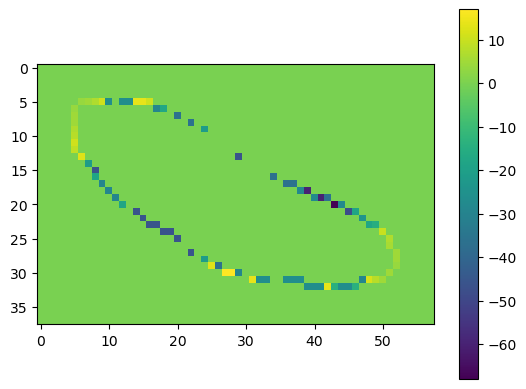

In [7]:
r_c= BLC.local_radius_curvature(props[nuc_of_interest[0]].image,step=5,show_boundary=True)
#calculate local curvature features
local_curvature=[np.divide(1,r_c[x]) if r_c[x]!=0 else 0 for x in range(len(r_c))]

Now that we have the local curvature for all points on the boundary, we compute features that describe it such as average and standard deviation of curature (positive and negative), number of time the polarity changes etc. Feature names are self-descriptive.  

In [8]:
#compute local and global features
global_features = BLC.global_curvature_features(np.array(local_curvature))
pd.DataFrame([global_features])

,avg_curvature,std_curvature,npolarity_changes,max_posi_curv,avg_posi_curv,med_posi_curv,std_posi_curv,sum_posi_curv,len_posi_curv,max_neg_curv,avg_neg_curv,med_neg_curv,std_neg_curv,sum_neg_curv,len_neg_curv
0,0.017819,0.075979,37,0.207992,0.126291,0.1202,0.050746,3.788735,30,0.071429,0.035192,0.034662,0.013173,1.935579,55


We also check to see if there are any prominant jumps in local curvature along the boundary. To do so we identify the presence of prominent peaks.  

,num_prominant_pos_curv,prominance_prominant_pos_curv,width_prominant_pos_curv,prominant_pos_curv,num_prominant_neg_curv,prominance_prominant_neg_curv,width_prominant_neg_curv,prominant_neg_curv
0,2,0.264823,10.193887,0.204348,1,0.266985,33.636396,-0.066281


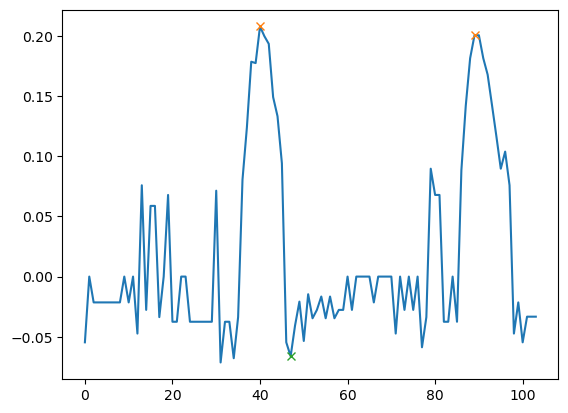

In [9]:
prominant_features = BLC.prominant_curvature_features(local_curvature,show_plot=True)
pd.DataFrame([prominant_features])


Below are the features computed for 4 nuclei. 

In [10]:
BLC_feat= pd.concat([BLC.measure_curvature_features(props[nuc_of_interest[0]].image,step=5),
                     BLC.measure_curvature_features(props[nuc_of_interest[1]].image,step=5),
                     BLC.measure_curvature_features(props[nuc_of_interest[2]].image,step=5),
                     BLC.measure_curvature_features(props[nuc_of_interest[3]].image,step=5)])
BLC_feat

,avg_curvature,std_curvature,npolarity_changes,max_posi_curv,avg_posi_curv,med_posi_curv,std_posi_curv,sum_posi_curv,len_posi_curv,max_neg_curv,...,prominance_prominant_pos_curv,width_prominant_pos_curv,prominant_pos_curv,num_prominant_neg_curv,prominance_prominant_neg_curv,width_prominant_neg_curv,prominant_neg_curv,frac_peri_w_posi_curvature,frac_peri_w_neg_curvature,frac_peri_w_polarity_changes
0,0.017819,0.075979,37,0.207992,0.126291,0.120200,0.050746,3.788735,30,0.071429,...,0.264823,10.193887,0.204348,1,0.266985,33.636396,-0.066281,0.245448,0.449988,0.302719
0,0.037343,0.032663,41,0.125562,0.051680,0.047379,0.023710,5.426451,105,0.027695,...,0.143619,10.483174,0.115924,4,0.122811,12.939168,-0.024809,0.636932,0.048528,0.248707
0,0.041474,0.023461,26,0.098052,0.048323,0.047379,0.016393,5.363855,111,0.033706,...,0.119523,5.218974,0.098052,0,NaN,NaN,NaN,0.746416,0.013449,0.174836
0,0.038613,0.025332,34,0.079597,0.048413,0.047379,0.015777,5.325463,110,0.033706,...,0.101067,11.341415,0.079597,0,NaN,NaN,NaN,0.700845,0.031857,0.216625


#### Intensity Features

DNA packing levels are encoded in their fluroscent intensity. Therefore we compute features that describe the intensity distribution of pixels within the nucleus.

These include features that describe the intensity distribution, entropy and heterocromatin ratios 

Below are the features computed for 4 nuclei. 

In [11]:
Int_feat= pd.concat([IDF.measure_intensity_features(props[nuc_of_interest[0]].image,props[nuc_of_interest[0]].intensity_image),
                     IDF.measure_intensity_features(props[nuc_of_interest[1]].image,props[nuc_of_interest[1]].intensity_image),
                     IDF.measure_intensity_features(props[nuc_of_interest[2]].image,props[nuc_of_interest[2]].intensity_image),
                     IDF.measure_intensity_features(props[nuc_of_interest[3]].image,props[nuc_of_interest[3]].intensity_image)])
Int_feat

,int_min,int_d25,int_median,int_d75,int_max,int_mean,int_mode,int_sd,kurtosis,skewness,entropy,i80_i20,nhigh_nlow,hc_area_ec_area,hc_area_nuc_area,hc_content_ec_content,hc_content_dna_content
0,9.589041,26.027397,36.301369,43.150684,58.904110,34.732658,39.041096,10.781276,-0.920826,-0.182805,4.097007,1.857143,0.935484,0.198319,0.165498,0.310855,0.237139
0,5.479452,21.232878,28.082191,35.616440,54.794521,28.754650,27.397261,10.229048,-0.650794,0.131091,5.177119,2.000000,1.018041,0.241602,0.194589,0.423363,0.297438
0,6.849315,20.547945,24.657536,28.767124,43.835617,24.819645,23.287672,6.101101,-0.334867,0.081605,4.796370,1.517241,0.947514,0.186765,0.157373,0.278327,0.217727
0,15.753425,32.191780,37.671234,43.835617,71.232880,38.256947,35.616440,8.775164,0.231439,0.230922,5.171608,1.488889,0.967828,0.190413,0.159955,0.276591,0.216664


#### Image Textures
Here we compute features that describe the texture of the image.

These include the GLCM features at various lengths as well as image moments. 

Below are the features computed for 4 nuclei. 

In [12]:
Int_Text= pd.concat([IT.measure_texture_features(props[nuc_of_interest[0]].image,props[nuc_of_interest[0]].intensity_image),
                     IT.measure_texture_features(props[nuc_of_interest[1]].image,props[nuc_of_interest[1]].intensity_image),
                     IT.measure_texture_features(props[nuc_of_interest[2]].image,props[nuc_of_interest[2]].intensity_image),
                     IT.measure_texture_features(props[nuc_of_interest[3]].image,props[nuc_of_interest[3]].intensity_image)])
Int_Text

,contrast_1,contrast_5,contrast_20,dissimilarity_1,dissimilarity_5,dissimilarity_20,homogeneity_1,homogeneity_5,homogeneity_20,asm_1,...,moments_central-3-1,moments_central-3-2,moments_central-3-3,moments_hu-0,moments_hu-1,moments_hu-2,moments_hu-3,moments_hu-4,moments_hu-5,moments_hu-6
0,40.621527,318.341684,938.927888,3.546037,11.799700,25.849655,0.526023,0.361122,0.147745,0.184131,...,4.522561e+06,-1.341868e+07,1.283567e+09,0.278132,0.050698,6.359831e-04,8.032946e-05,1.395955e-09,-5.278407e-06,-1.810288e-08
0,21.434734,114.225278,449.573195,2.941734,7.637967,17.364071,0.427287,0.229568,0.071736,0.051773,...,2.244878e+06,-2.498966e+07,-4.275299e+08,0.161455,0.000078,1.325327e-04,1.557887e-07,-7.075753e-13,8.255558e-10,2.109835e-14
0,23.307141,103.723998,265.333361,3.108531,7.276075,12.571142,0.391786,0.214403,0.107354,0.034638,...,-5.541730e+06,-9.540562e+05,-1.061398e+09,0.161093,0.000593,3.744189e-07,3.680498e-09,-1.156270e-17,1.382977e-11,1.361375e-16
0,51.412938,280.372060,519.726068,4.282468,10.943451,17.683878,0.358148,0.195349,0.080698,0.034604,...,-5.109879e+06,4.837510e+06,-1.137682e+09,0.160469,0.000394,3.761052e-06,1.461068e-08,9.491019e-16,8.965370e-11,-3.290870e-15


### Compilation

If interested, one can combine all the different categories of features for a consolidated feature set. 

In [13]:
features = pd.concat([pd.DataFrame(nuc_of_interest, columns=["label"]),
           BG_feat.reset_index(drop=True), 
           BLC_feat.reset_index(drop=True), 
           Int_feat.reset_index(drop=True),
           Int_Text.reset_index(drop=True)], axis=1)

features

,label,min_calliper,max_calliper,smallest_largest_calliper,min_radius,max_radius,med_radius,avg_radius,mode_radius,d25_radius,...,moments_central-3-1,moments_central-3-2,moments_central-3-3,moments_hu-0,moments_hu-1,moments_hu-2,moments_hu-3,moments_hu-4,moments_hu-5,moments_hu-6
0,90,17,52,0.326923,6.684992,26.706533,13.931728,14.974471,6.684992,10.191503,...,4.522561e+06,-1.341868e+07,1.283567e+09,0.278132,0.050698,6.359831e-04,8.032946e-05,1.395955e-09,-5.278407e-06,-1.810288e-08
1,112,48,54,0.888889,21.315376,27.667601,24.044525,24.227259,21.315376,23.135437,...,2.244878e+06,-2.498966e+07,-4.275299e+08,0.161455,0.000078,1.325327e-04,1.557887e-07,-7.075753e-13,8.255558e-10,2.109835e-14
2,216,42,49,0.857143,19.474128,24.082186,22.484315,22.208761,19.474128,20.896185,...,-5.541730e+06,-9.540562e+05,-1.061398e+09,0.161093,0.000593,3.744189e-07,3.680498e-09,-1.156270e-17,1.382977e-11,1.361375e-16
3,301,45,51,0.882353,21.112323,25.382417,23.568662,23.379913,21.112323,22.291394,...,-5.109879e+06,4.837510e+06,-1.137682e+09,0.160469,0.000394,3.761052e-06,1.461068e-08,9.491019e-16,8.965370e-11,-3.290870e-15


In [14]:
all_features = pd.DataFrame()
pd.concat([all_features, BG_feat.reset_index(drop=True)], axis=0)

,min_calliper,max_calliper,smallest_largest_calliper,min_radius,max_radius,med_radius,avg_radius,mode_radius,d25_radius,d75_radius,...,equivalent_diameter,major_axis_length,minor_axis_length,eccentricity,orientation,concavity,solidity,a_r,shape_factor,area_bbarea
0,17,52,0.326923,6.684992,26.706533,13.931728,14.974471,6.684992,10.191503,19.184586,...,30.130048,53.579712,17.382280,0.945913,1.105716,0.054377,0.945623,0.324419,1.667337,0.530506
1,48,54,0.888889,21.315376,27.667601,24.044525,24.227259,21.315376,23.135437,25.332991,...,49.468843,51.168146,48.444670,0.321899,-1.397414,0.022380,0.977620,0.946774,1.125199,0.740085
2,42,49,0.857143,19.474128,24.082186,22.484315,22.208761,19.474128,20.896185,23.406323,...,45.332203,48.933539,42.018660,0.512498,-0.374169,0.022411,0.977589,0.858688,1.090363,0.781977
3,45,51,0.882353,21.112323,25.382417,23.568662,23.379913,21.112323,22.291394,24.341738,...,47.713230,50.787427,44.847808,0.469280,-0.296335,0.022951,0.977049,0.883049,1.096386,0.777391


For a quick extraction of all features given a segmented image use the following code:

In [15]:
from nmco.utils.run_nuclear_feature_extraction import run_nuclear_chromatin_feat_ext

features = run_nuclear_chromatin_feat_ext(raw_image_path,labelled_image_path,feature_path)

100%|█████████████████████████████████████████████████████████████████| 351/351 [00:41<00:00,  8.51it/s]


In [16]:
features

,label,min_calliper,max_calliper,smallest_largest_calliper,min_radius,max_radius,med_radius,avg_radius,mode_radius,d25_radius,...,moments_central-3-1,moments_central-3-2,moments_central-3-3,moments_hu-0,moments_hu-1,moments_hu-2,moments_hu-3,moments_hu-4,moments_hu-5,moments_hu-6
0,23,34,43,0.790698,14.255159,22.052695,17.910834,18.199261,14.255159,16.623967,...,2.312336e+06,-2.530403e+06,4.048414e+08,0.167187,0.001854,2.021111e-04,5.500249e-06,1.510264e-10,1.802883e-07,-1.040280e-10
1,86,26,56,0.464286,9.707393,28.786945,17.641046,18.092208,9.707393,13.451198,...,4.495442e+06,3.772735e+07,1.347800e+09,0.218627,0.019149,1.322580e-03,1.040722e-04,5.993156e-09,-4.820324e-07,3.814320e-08
2,88,33,51,0.647059,13.467400,26.730660,20.332153,19.858906,13.467400,16.679092,...,-1.019273e+07,1.688381e+07,-1.295718e+09,0.177696,0.005065,2.992078e-04,1.840409e-05,4.999139e-10,3.680336e-07,-1.270923e-09
3,121,28,64,0.437500,11.768094,32.903382,22.110362,21.757090,11.768094,14.548192,...,-2.206024e+07,-6.997149e+07,-2.318691e+09,0.228673,0.025495,4.475861e-04,3.984205e-05,8.542782e-10,-1.087364e-07,5.251449e-09
4,128,15,18,0.833333,6.419000,8.883237,7.333954,7.377007,6.419000,7.044133,...,-4.429104e+03,-4.648531e+03,-1.583802e+05,0.161320,0.000450,1.043143e-05,2.306681e-07,3.488632e-13,4.634690e-09,7.951631e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,8896,47,51,0.921569,22.041439,24.882032,23.296360,23.454452,22.041439,22.884782,...,4.561248e+06,-1.322593e+07,9.022049e+08,0.159543,0.000086,3.809779e-06,1.071345e-09,6.477293e-17,3.641630e-12,-2.211863e-17
347,8905,43,53,0.811321,19.904300,26.323521,22.757210,22.965170,19.904300,21.457096,...,-5.332222e+06,-6.182660e+06,-1.393160e+09,0.162762,0.001112,8.675880e-07,5.860358e-09,3.782930e-16,8.867372e-11,-1.775140e-16
348,8930,50,56,0.892857,23.809596,27.834000,26.219474,25.999617,23.809596,25.244875,...,6.943612e+05,1.777198e+06,-9.120209e+07,0.159975,0.000220,1.074190e-05,1.936681e-08,8.524205e-15,2.850755e-10,-2.316633e-15
349,8978,39,46,0.847826,17.820860,22.739753,20.132848,20.254221,17.820860,19.285850,...,-2.647910e+06,2.206293e+05,-4.969348e+08,0.161394,0.000638,8.292274e-06,7.376116e-08,-1.962247e-14,-1.001827e-09,5.424718e-14


#### Tissue level summary:

In order to characterise the nuclear features in a given image, we compute the distribution characteristics of each of the computed NMCO features.

The measures available are: Median, Min, Max, Standard Deviation (SD) Coefficient of Variation (CV) and Coefficient of Dispersion (CD), Inter_Quartile_Range(IQR) and Quartile Coeffient of Dispersrion (QCD).


In [17]:
# Check which columns have all NaN values
def check_nan_columns(df):
    nan_columns = df.columns[df.isna().all()].tolist()
    print("Columns with all NaN values:")
    for col in nan_columns:
        print(f"- {col}")
    
    print("\nPercentage of NaN values in each column:")
    nan_percentage = (df.isna().sum() / len(df)) * 100
    print(nan_percentage[nan_percentage > 0].sort_values(ascending=False))

# Assuming 'features' is your DataFrame
check_nan_columns(features)

Columns with all NaN values:
- weighted_moments_normalized-0-0
- weighted_moments_normalized-0-1
- weighted_moments_normalized-1-0
- moments_normalized-0-0
- moments_normalized-0-1
- moments_normalized-1-0

Percentage of NaN values in each column:
weighted_moments_normalized-0-0    100.000000
weighted_moments_normalized-0-1    100.000000
weighted_moments_normalized-1-0    100.000000
moments_normalized-0-0             100.000000
moments_normalized-0-1             100.000000
moments_normalized-1-0             100.000000
prominance_prominant_pos_curv       88.034188
width_prominant_pos_curv            88.034188
prominant_pos_curv                  88.034188
prominance_prominant_neg_curv       48.148148
width_prominant_neg_curv            48.148148
prominant_neg_curv                  48.148148
dtype: float64


In [18]:
# Remove columns with all NaN values
features_cleaned = features.dropna(axis=1, how='all')

# Optional: Remove rows with all NaN values
features_cleaned = features_cleaned.dropna(axis=0, how='all')

# Now try summarizing again
from nmco.utils.summarising_features import summarise_feature_table
summary = summarise_feature_table(features_cleaned)

In [19]:
# Print the shape of your input data
print("Original shape:", features.shape)
print("Cleaned shape:", features_cleaned.shape)

# Check if you have valid input data
print("\nUnique labels in the data:")
print(features['label'].value_counts())

Original shape: (351, 202)
Cleaned shape: (351, 196)

Unique labels in the data:
label
23      1
6713    1
6793    1
6780    1
6776    1
       ..
3866    1
3840    1
3696    1
3673    1
8996    1
Name: count, Length: 351, dtype: int64


TypeError: 'str' object is not callable

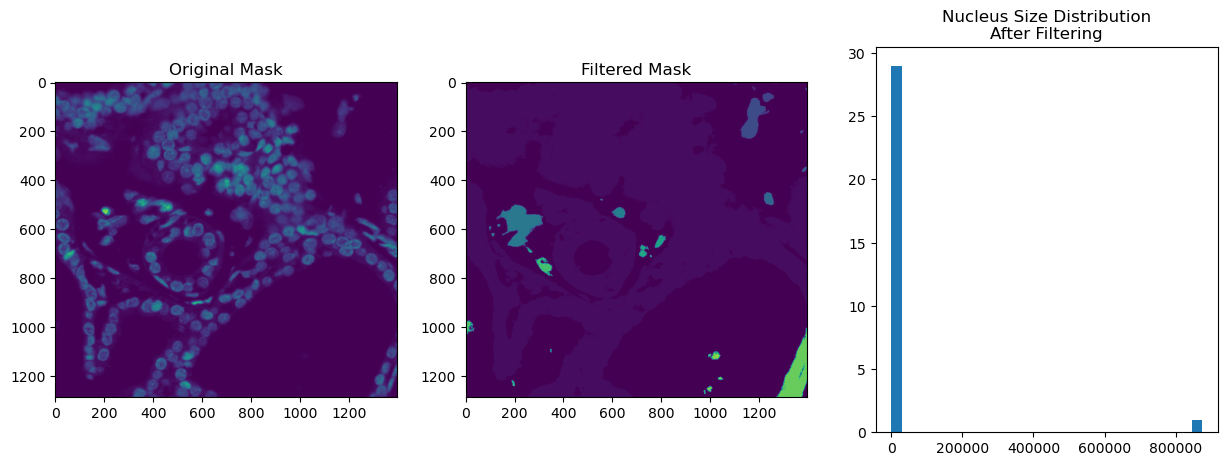

In [30]:
# Visualization and analysis of segmentation
import matplotlib.pyplot as plt
from skimage import morphology

# Load your mask
mask = imread(raw_image_path)

# Plot original mask
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(mask)
plt.title('Original Mask')

# Filter small objects
filtered_mask = morphology.remove_small_objects(mask.astype(bool), min_size=50)
filtered_mask = measure.label(filtered_mask)

# Plot filtered mask
plt.subplot(132)
plt.imshow(filtered_mask)
plt.title('Filtered Mask')

# Size distribution after filtering
props = measure.regionprops(filtered_mask)
sizes = [prop.area for prop in props]
plt.subplot(133)
plt.hist(sizes, bins=30)
plt.title('Nucleus Size Distribution\nAfter Filtering')
plt.xlabel('Area (pixels)')
plt.ylabel('Count')
plt.show()

print(f"Number of nuclei after filtering: {len(props)}")
print(f"Average nucleus size after filtering: {np.mean(sizes):.2f} pixels")

In [31]:
# 1. If your original image was downsampled, load it at full resolution
from skimage.transform import resize

# Resize your mask if needed
upscaled_mask = resize(mask, (mask.shape[0]*4, mask.shape[1]*4), 
                      order=0, preserve_range=True, anti_aliasing=False)

# 2. Filter small objects and holes
min_nucleus_size = 100  # adjust based on your data
filtered_mask = morphology.remove_small_objects(upscaled_mask.astype(bool), 
                                             min_size=min_nucleus_size)
filtered_mask = morphology.remove_small_holes(filtered_mask, area_threshold=20)

# 3. Label the filtered mask
labeled_mask = measure.label(filtered_mask)

# 4. Save the processed mask
from tifffile import imsave
imsave('processed_nuclei_mask.tif', labeled_mask.astype(np.uint16))

# Now try running the feature extraction again with the processed mask
from nmco.utils.run_nuclear_feature_extraction import run_nuclear_chromatin_feat_ext

features = run_nuclear_chromatin_feat_ext(
    raw_image_path,
    labelled_image_path='processed_nuclei_mask.tif',
    output_dir='output/'
)

C:\Users\Dell\AppData\Local\Temp\ipykernel_31360\2093572527.py:19: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('processed_nuclei_mask.tif', labeled_mask.astype(np.uint16))


ValueError: Label and intensity image shapes must match, except for channel (last) axis.

In [25]:
# Remove small nuclei from your mask
min_size = 100  # adjust this threshold based on your data
mask_filtered = morphology.remove_small_objects(mask, min_size=min_size)

NameError: name 'morphology' is not defined

In [24]:
from nmco.utils.summarising_features import summarise_feature_tablea
summarise_feature_table(features)

D:\Acad 3 - 2\Project\chrometrics\notebooks\..\nmco\utils\summarising_features.py:18: RuntimeWarning: All-NaN slice encountered
  np.array(np.nanmedian(data.drop(["label"], axis=1), axis=0))
D:\Acad 3 - 2\Project\chrometrics\notebooks\..\nmco\utils\summarising_features.py:35: RuntimeWarning: All-NaN slice encountered
  / np.array(np.nanmedian(data.drop(["label"], axis=1), axis=0))
D:\Acad 3 - 2\Project\chrometrics\notebooks\..\nmco\utils\summarising_features.py:40: RuntimeWarning: All-NaN slice encountered
  / np.array(np.nanmedian(data.drop(["label"], axis=1), axis=0))
D:\cONDA\Lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
D:\cONDA\Lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
D:\cONDA\Lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


,median_min_calliper,median_max_calliper,median_smallest_largest_calliper,median_min_radius,median_max_radius,median_med_radius,median_avg_radius,median_mode_radius,median_d25_radius,median_d75_radius,...,QCD_moments_central-3-1,QCD_moments_central-3-2,QCD_moments_central-3-3,QCD_moments_hu-0,QCD_moments_hu-1,QCD_moments_hu-2,QCD_moments_hu-3,QCD_moments_hu-4,QCD_moments_hu-5,QCD_moments_hu-6
0,35.0,49.0,0.730769,15.001611,24.761636,19.993598,20.230219,15.108747,17.659448,22.423284,...,-2.186532,31.013997,-1.774968,0.066716,0.845839,0.831118,0.969414,1.023732,1.713464,-1.659946
